# pandas :: Groupby I

In [1]:
import pandas as pd

### Groupby

- SQL groupby 명령어와 같음
- split  ->  apply  ->  combine 과정을 거쳐 연산함

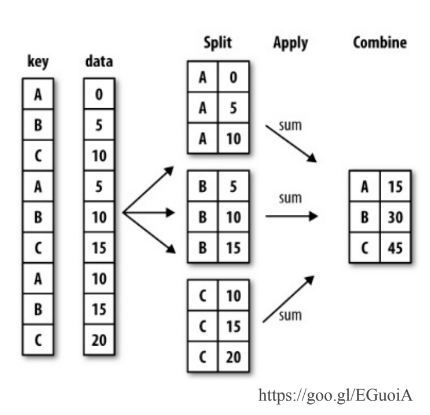

In [2]:
# data from: 
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}

df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


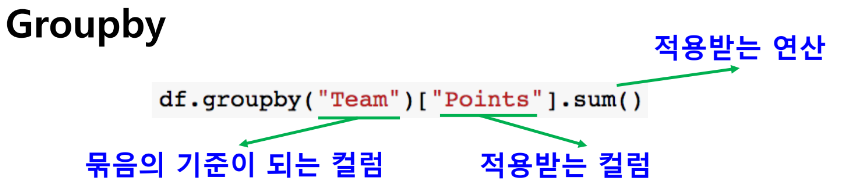

In [3]:
df.groupby("Team")["Points"].sum()  #Team을 기준으로 Points을 sum

Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

In [4]:
# 한개 이상의 column을 묶을 수 있음
df.groupby(["Team", "Year"])["Points"].sum()

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

### Hierarchical index

- Groupby 명령의 결과물도 결국은 dataframe
- 두 개의 column으로 groupby를 할 경우, index가 두 개 생성

In [5]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [6]:
h_index = df.groupby(["Team", "Year"])["Points"].sum()
h_index

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

In [7]:
h_index.index

MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015),
            ( 'kings', 2015)],
           names=['Team', 'Year'])

In [8]:
h_index["Devils":"Kings"]

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Name: Points, dtype: int64

### Hierarchical index - unstack()

- Group으로 묶여진 데이터를 matrix 형태로 전환해줌

In [9]:
h_index.unstack()

Year,2014,2015,2016,2017
Team,,,,
Devils,863.0,673.0,NaN,NaN
Kings,741.0,NaN,756.0,788.0
Riders,876.0,789.0,694.0,690.0
Royals,701.0,804.0,NaN,NaN
kings,NaN,812.0,NaN,NaN


### Hierarchical index - swaplevel

- Index level을 변경할 수 있음

In [14]:
h_index.swaplevel()

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2016  Kings     756
2017  Kings     788
2014  Riders    876
2015  Riders    789
2016  Riders    694
2017  Riders    690
2014  Royals    701
2015  Royals    804
      kings     812
Name: Points, dtype: int64

In [15]:
h_index.swaplevel().sortlevel(0)

AttributeError: 'Series' object has no attribute 'sortlevel'

In [16]:
h_index.sum(level=0)

Team
Devils    1536
Kings     2285
Riders    3049
Royals    1505
kings      812
Name: Points, dtype: int64

In [17]:
h_index.sum(level=1)

Year
2014    3181
2015    3078
2016    1450
2017    1478
Name: Points, dtype: int64

# pandas :: Groupby II 

### Groupby - grouped

- Groupby에 의해 Split된 상태를 추출 가능함

In [19]:
grouped = df.groupby("Team")

for name,group in grouped:
    print(name)
    print(group)
    
# Tuple 형태로 그룹의 key값 value값이 추출됨

Devils
     Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673
Kings
    Team  Rank  Year  Points
4  Kings     3  2014     741
6  Kings     1  2016     756
7  Kings     1  2017     788
Riders
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
Royals
      Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804
kings
    Team  Rank  Year  Points
5  kings     4  2015     812


In [20]:
# 특정 key값을 가진 그룹의 정보만 추출 가능
grouped.get_group("Devils")

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673


### Groupby - aggregation 

- 요약된 통계 정보를 추출해줌

In [21]:
grouped.agg(sum)

,Rank,Year,Points
Team,,,
Devils,5,4029,1536
Kings,5,6047,2285
Riders,7,8062,3049
Royals,5,4029,1505
kings,4,2015,812


In [22]:
import numpy as np
grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.500000,2014.500000,768.000000
Kings,1.666667,2015.666667,761.666667
Riders,1.750000,2015.500000,762.250000
Royals,2.500000,2014.500000,752.500000
kings,4.000000,2015.000000,812.000000


In [23]:
# 특정 컬럼에 여러개의 함수를 적용할 수도 있음
grouped['Points'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Team,,,
Devils,1536,768.000000,134.350288
Kings,2285,761.666667,24.006943
Riders,3049,762.250000,88.567771
Royals,1505,752.500000,72.831998
kings,812,812.000000,NaN


### Groupby - transformation

- aggregation과 달리 key값 별로 요약된 정보가 아님
- 개별 데이터의 변환을 지원함

In [24]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [25]:
score = lambda x : (x)
grouped.transform(score)

,Rank,Year,Points
0,1,2014,876
1,2,2015,789
2,2,2014,863
3,3,2015,673
4,3,2014,741
5,4,2015,812
6,1,2016,756
7,1,2017,788
8,2,2016,694
9,4,2014,701


In [26]:
# 단 max나 min처럼 Series 데이터에 적용되는 데이터들은 
# key값을 기준으로 grouped된 데이터 기준  (잘 안씀~)
score = lambda x: (x.max())
grouped.transform(score)

,Rank,Year,Points
0,2,2017,876
1,2,2017,876
2,3,2015,863
3,3,2015,863
4,3,2017,788
5,4,2015,812
6,3,2017,788
7,3,2017,788
8,2,2017,876
9,4,2015,804



$$
z_i=\frac{x_i-\mu}{\sigma}
$$


In [28]:
score = lambda x: (x-x.mean()) / x.std() 
grouped.transform(score)

,Rank,Year,Points
0,-1.500000,-1.161895,1.284327
1,0.500000,-0.387298,0.302029
2,-0.707107,-0.707107,0.707107
3,0.707107,0.707107,-0.707107
4,1.154701,-1.091089,-0.860862
5,NaN,NaN,NaN
6,-0.577350,0.218218,-0.236043
7,-0.577350,0.872872,1.096905
8,0.500000,0.387298,-0.770596
9,0.707107,-0.707107,-0.707107


### Groupby - filtration 

- 특정 정보를 제거하여 보여주는 필터링 기능
- filter 안에는 boolean 조건이 존재해야함
- len(x)는 grouped된 dataframe 개수

In [35]:
df.groupby('Team').filter(lambda x: len(x) >= 3)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [36]:
df.groupby('Team').filter(lambda x: x["Rank"].sum() > 2)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [37]:
df.groupby('Team').filter(lambda x: x["Points"].sum() > 1000)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701
10,Royals,1,2015,804


In [38]:
df.groupby('Team').filter(lambda x: x["Rank"].mean() > 1)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701
